In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston


In [3]:
# Carregar o dataset
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target  # Adicionando a vari√°vel alvo (pre√ßo das casas)

# Exibir as primeiras linhas
df.head()


/Users/ralph/.pyenv/versions/3.9.19/envs/IA/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [4]:
# TODO: Escolha uma vari√°vel para ser usada na regress√£o linear (ex: 'RM' - n√∫mero m√©dio de quartos por resid√™ncia)
X = df[['RM']]  # N√∫mero m√©dio de quartos
y = df['MEDV']  # Pre√ßo da casa

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibir estat√≠sticas b√°sicas
df[['RM', 'MEDV']].describe()


RM        MEDV
count  506.000000  506.000000
mean     6.284634   22.532806
std      0.702617    9.197104
min      3.561000    5.000000
25%      5.885500   17.025000
50%      6.208500   21.200000
75%      6.623500   25.000000
max      8.780000   50.000000

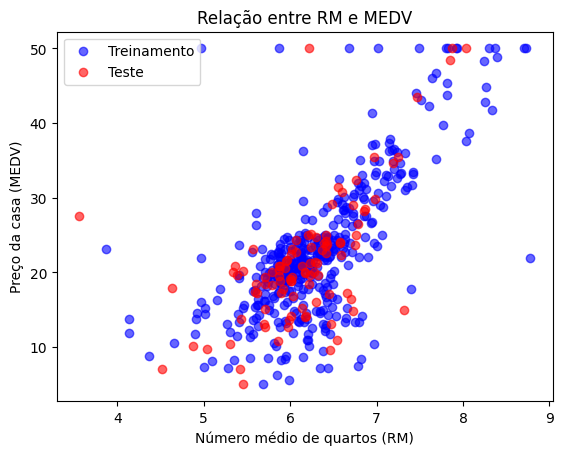

In [5]:
plt.scatter(X_train, y_train, label='Treinamento', color='blue', alpha=0.6)
plt.scatter(X_test, y_test, label='Teste', color='red', alpha=0.6)
plt.legend()
plt.xlabel("N√∫mero m√©dio de quartos (RM)")
plt.ylabel("Pre√ßo da casa (MEDV)")
plt.title("Rela√ß√£o entre RM e MEDV")
plt.show()


In [6]:
# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtendo os coeficientes
m = modelo.coef_[0]
b = modelo.intercept_

print(f"Equa√ß√£o da reta estimada: MEDV = {m:.2f} * RM + {b:.2f}")


Equa√ß√£o da reta estimada: MEDV = 9.35 * RM + -36.25


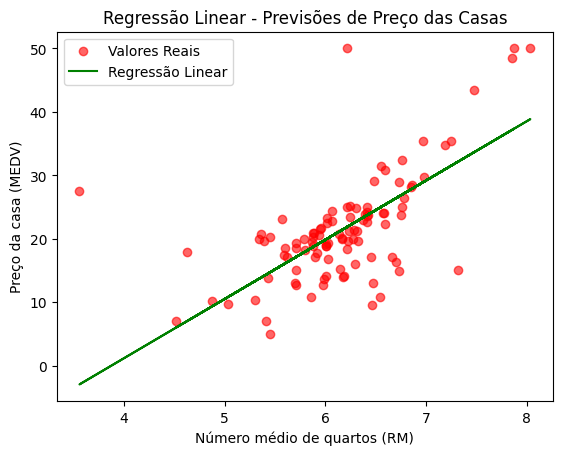

In [8]:
# Fazendo previs√µes
y_pred = modelo.predict(X_test)

# Visualizando os resultados
plt.scatter(X_test, y_test, label='Valores Reais', color='red', alpha=0.6)
plt.plot(X_test, y_pred, label='Regress√£o Linear', color='green')
plt.legend()
plt.xlabel("N√∫mero m√©dio de quartos (RM)")
plt.ylabel("Pre√ßo da casa (MEDV)")
plt.title("Regress√£o Linear - Previs√µes de Pre√ßo das Casas")
plt.show()


## üìå Reflex√£o Final üß†
Agora que voc√™ treinou a regress√£o linear, responda:

1Ô∏è‚É£ O modelo conseguiu prever corretamente os pre√ßos das casas?
2Ô∏è‚É£ O coeficiente obtido faz sentido? Quanto um quarto a mais impacta no pre√ßo?
3Ô∏è‚É£ O que aconteceria se adicion√°ssemos mais vari√°veis ao modelo?

üí° Experimente testar outras vari√°veis para melhorar a previs√£o! üöÄ
